# Classification

As previously mentionned, most of the machine learning algorithms are either for regression ( numerical preiction ) or classification. In this chapter, we will dive deep into the classification part, taking a look at the process 

## Downloading the MNIST dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## Importin libraries and preparing the data

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [12]:
X,y = mnist['data'], mnist['target']

In [13]:
print(f"The data shape is {X.shape}")
print(f"The labels shape is {y.shape}")

The data shape is (70000, 784)
The labels shape is (70000,)


Which means that we have 70000 images of 28x28 pixels in the data, and 70000 labels correspondant to each number

In [25]:
digit = np.asanyarray(X.iloc[0])
digit = digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

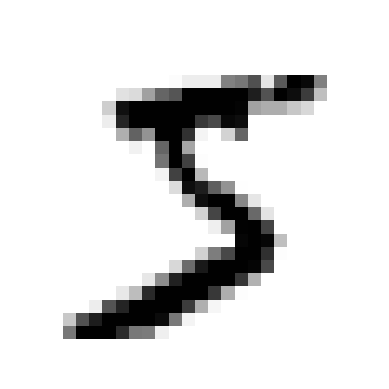

In [30]:
plt.imshow(digit,cmap=mpl.cm.binary,interpolation='nearest')
plt.axis('off')

Here we can see that we got the image of a 5, and by printing the label correspondant to It, we will find that It is correctly a 5

In [31]:
y[0]

'5'

But, here we see that the 5 is a string ,but Us we prefer to work with integers ,for that we will cast It into an integer

In [32]:
y = y.astype(np.uint8)

In [33]:
y[0]

5

Normally, we should split the dataset into a training set and a test set, but the dataset is already split ( the first 60000 for training and the 10000 for test)

In [34]:
X_train, X_test, y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

## Training a binary classifier

For now, we will only create a binary classifier for the number 5

In [38]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

For the binary classifier, a good start is to use the Stochastic Gradient Descent. It is well used, because It relies on dealing with training instances independently, which makes Ir suitable for online training

So, setting random_state=42 in your SGDClassifier instantiation ensures that if you or someone else runs the same code with the same random seed, you'll get the same results. This is useful for debugging, sharing code, and ensuring that any differences in results are due to changes in the code or data, not variations introduced by random processes.

In [36]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

In [39]:
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [47]:
sgd_clf.predict(X_train)

array([ True, False, False, ...,  True, False, False])

## Performance Measures

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

You might see that the accuracy is above 95% and think that this is good, but actually, even working with a dummy classifier, can give us an accuracy of 90%. For that, we don't use accuracy with classifiers

### Confusion Matrix

In [56]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

Just like the cross_val_score, we do K-folds to the training set, but we don't return the evaluation score, but instead, we got return a set of predictions

In [58]:
# Now, time for the confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Each row in a confusion matrix represents an actual class, while each column repre‐
sents a predicted class.

Each row in a confusion matrix represents an actual class, while each column repre‐
sents a predicted class. The first row of this matrix considers non-5 images (the nega‐
tive class): 53,057 of them were correctly classified as non-5s (they are called true
negatives), while the remaining 1,522 were wrongly classified as 5s (false positives).
The second row considers the images of 5s (the positive class): 1,325 were wrongly
classified as non-5s (false negatives), while the remaining 4,096 were correctly classi‐
fied as 5s (true positives). A perfect classifier would have only true positives and true
negatives, so its confusion matrix would have nonzero values only on its main diago‐
nal (top left to bottom right):

The confusion matrix gives you a lot of information, but sometimes you may prefer a
more concise metric. An interesting one to look at is the accuracy of the positive pre‐
dictions; this is called the precision of the classifier (

precision = TP/(TP+FP)

A trivial way to have perfect precision is to make one single positive prediction and
ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the
classifier would ignore all but one positive instance. So precision is typically used
along with another metric named recall, also called sensitivity or true positive rate

recall = TP/(TP+ FN)

In [59]:
from sklearn.metrics import recall_score,precision_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [60]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

A more convenient way is to use the F1-score, which combines both precision and recall

\[ F1 = \frac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} \]

In [61]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343846

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and
vice versa. This is called the precision/recall tradeo

Scikit-Learn does not let you set the threshold directly, but it does give you access to
the decision scores that it uses to make predictions. Instead of calling the classifier’s
predict() method, you can call its decision_function() method, which returns a
score for each instance, and then make predictions based on those scores using any
threshold you want:

In [69]:
y_scores = sgd_clf.decision_function(digit.reshape(1,-1))
y_scores

threshhold = 0
y_digit_pred = (y_scores > threshhold)
y_digit_pred

c:\Users\moham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [70]:
threshhold = 8000
y_digit_pred = (y_scores > threshhold)
y_digit_pred

array([False])

Now how do you decide which threshold to use? For this you will first need to get the
scores of all instances in the training set using the cross_val_predict() function
again, but this time specifying that you want it to return decision scores instead of
predictions:

In [71]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

Now with these scores you can compute precision and recall for all possible thresh‐
olds using the precision_recall_curve() function:

In [79]:
from sklearn.metrics import precision_recall_curve

precisions,recalls, threshholds = precision_recall_curve(y_train_5,y_scores)

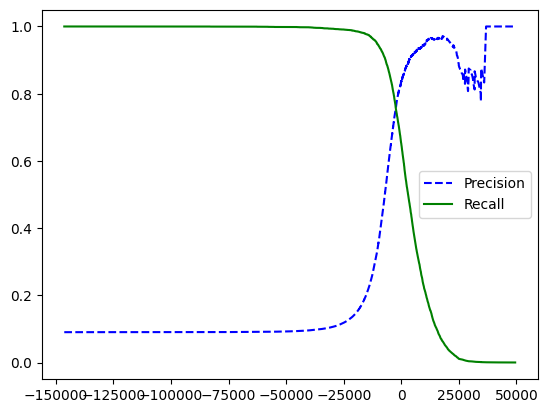

In [80]:
plt.plot(threshholds,precisions[:-1],"b--",label="Precision")
plt.plot(threshholds,recalls[:-1],"g-",label="Recall")
plt.legend()

So let’s suppose you decide to aim for 90% precision. You look up the first plot and
find that you need to use a threshold of about 8,000. To be more precise you can
search for the lowest threshold that gives you at least 90% precision (np.argmax()
will give us the first index of the maximum value, which in this case means the first
True value):

In [83]:
threshhold_90_precision = threshholds[np.argmax(precisions >= 0.9)]



y_train_pred_90 = (y_scores >= threshhold_90_precision)

In [84]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [86]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

## The ROC curve

The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate. The FPR is the ratio of negative instances that
are incorrectly classified as positive. It is equal to one minus the true negative rate, 
which is the ratio of negative instances that are correctly classified as negative. The
TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus
1 – specificity.

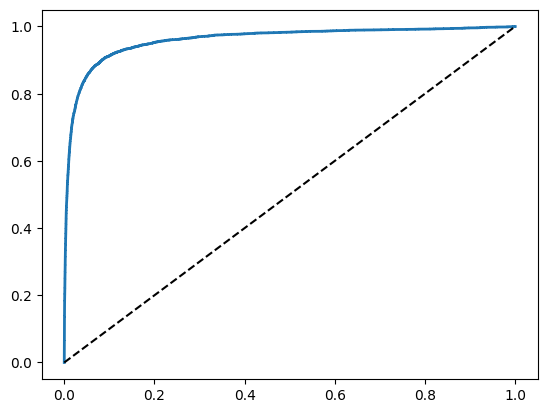

In [89]:
from sklearn.metrics import roc_curve

fpr,tpr,threshholds = roc_curve(y_train_5,y_scores)

plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

Once again there is a tradeoff: the higher the recall (TPR), the more false positives
(FPR) the classifier produces. The dotted line represents the ROC curve of a purely
random classifier; a good classifier stays as far away from that line as possible (toward
the top-left corner).
One way to compare classifiers is to measure the area under the curve (AUC). A per‐
fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC
AUC:

In [90]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

Since the ROC curve is so similar to the precision/recall (or PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve otherwise. For example,
looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the topright corner).

## Comparaison to a RandomForestClassifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')

But to plot a ROC curve, you need scores, not probabilities. A simple solution is to
use the positive class’s probability as the score:

In [92]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest,threshholds_forest = roc_curve(y_train_5,y_scores_forest)

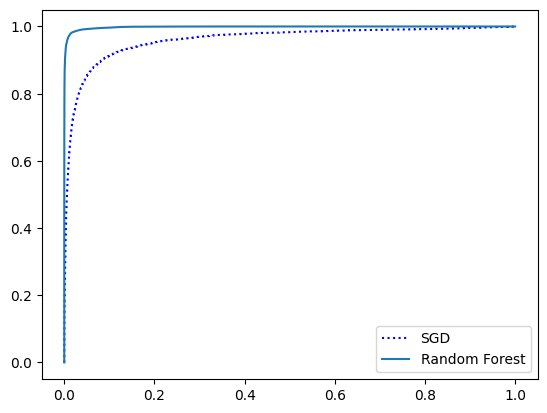

In [99]:
plt.plot(fpr,tpr,"b:",label="SGD")
plt.plot(fpr_forest,tpr_forest,label="Random Forest")
plt.legend(loc='lower right')

As you can see in Figure 3-7, the RandomForestClassifier’s ROC curve looks much
better than the SGDClassifier’s: it comes much closer to the top-left corner. As a
result, its ROC AUC score is also significantly better

In [100]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

Try measuring the precision and recall scores: you should find 99.0% precision and
86.6% recall. Not too bad!

## Mutliclass Classification

Scikit-Learn detects when you try to use a binary classification algorithm for a multi‐
class classification task, and it automatically runs OvA (except for SVM classifiers for
which it uses OvO). Let’s try this with the SGDClassifier:

In [3]:
sgd_clf.fit(X_train,y_train)


NameError: name 'sgd_clf' is not defined

In [2]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

NameError: name 'cross_val_score' is not defined

It gets over 84% on all test folds. If you used a random classifier, you would get 10%
accuracy, so this is not such a bad score, but you can still do much better. For exam‐
ple, simply scaling the inputs (as discussed in Chapter 2) increases accuracy above
89%: